# Objective
1. Joining in Pandas 
  - 1.1 Inner join
    - One-to-many merge
    - Merging multiple tables
  - 1.2 Left and right join
  - 1.3 Outer join 
  - 1.4 Self join
  - 1.5 Index merge
  - 1.6 Anti-join and semi-join
  - 1.7 Concatenate DataFrames together vertically
  - 1.8 Vertifying intergrity 
2. Merge time-series data
  - 2.1 .merge_ordered()
  - 2.2 .merge_asof()
  - 2.3 .query()
  - 2.4 .melt()
3. SQL: using SOLite database & SQLAlchemy package
 - 3.1 Creating a database engin
 - 3.2 Querying in relational database 
 - 3.3 Querying database directly with Pandas
 - 3.4 Advanced query 

## 1. Joning in Pandas

### 1.1 Inner join

In [ ]:
# Merge the taxi_owners and taxi_veh tables setting a suffix: 
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

In [ ]:
Output:
Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year', 'fuel_type', 'owner_veh'], dtype='object')

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64

**One-to-many merge**

In [ ]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners,on='account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values('account', ascending = False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

In [ ]:
Output:    
    account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970

**Merging multiple dataframes**

In [ ]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

Output:
140005

**Three tables join**

In [ ]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo,on='zip') \
            			.merge(wards,on='ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

In [ ]:
Output: 
                            income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          28024.0
Margaret Laurino            70122.0
Marty Quinn                 67045.0
Matthew J. O'Shea           59488.0
Michael R. Zalewski         42335.0
Willie B. Cochran           28024.0

**One-to-many merge with multiple tables**

In [ ]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant','account','pop_2010'], 
                                             ascending=[False,True,True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

In [ ]:
Output:
    ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156

### 1.2 Left join and right join

In [ ]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines,on='id',how='left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

In [ ]:
Output:
    id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
2    862    Toy Story      73.640   1995-10-30                       NaN
(3, 5)

In [ ]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isna()]

print(scifi_only)

In [ ]:
Output:
       movie_id genre_act        genre_sci
2          19       NaN  Science Fiction
3          38       NaN  Science Fiction
4          62       NaN  Science Fiction
5          68       NaN  Science Fiction
6          74       NaN  Science Fiction
..        ...       ...              ...
529    333371       NaN  Science Fiction
530    335866       NaN  Science Fiction
531    347548       NaN  Science Fiction
532    360188       NaN  Science Fiction
534    371690       NaN  Science Fiction

[258 rows x 3 columns]

In [ ]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on='movie_id', 
                                      right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

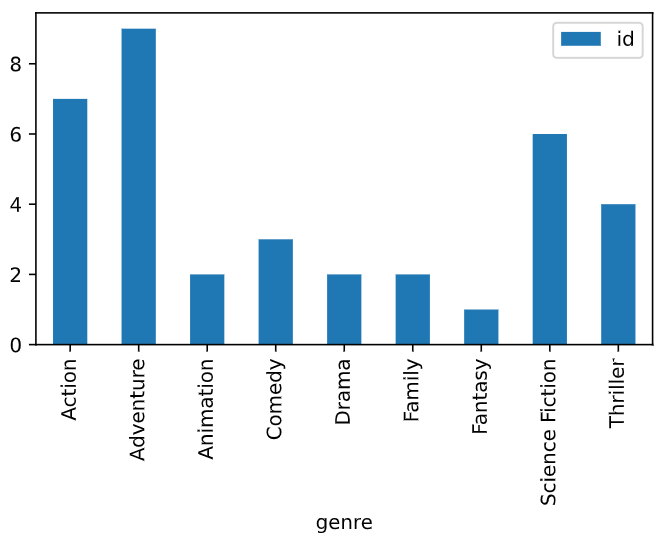

### 1.3 Outer join

In [ ]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, 
                                     on='id', 
                                     how='outer', 
                                     suffixes=('_1','_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

In [ ]:
Output:
                    character_1      id           name_1 character_2 name_2
0                       Yinsen   17857       Shaun Toub         NaN    NaN
2  Obadiah Stane / Iron Monger    1229     Jeff Bridges         NaN    NaN
3                  War Machine   18288  Terrence Howard         NaN    NaN
5                         Raza   57452      Faran Tahir         NaN    NaN
8                   Abu Bakaar  173810    Sayed Badreya         NaN    NaN

### 1.4 Self join

In [ ]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

In [ ]:
Output:
      id   job_dir       name_dir        job_crew          name_crew
156  19995  Director  James Cameron          Editor  Stephen E. Rivkin
157  19995  Director  James Cameron  Sound Designer  Christopher Boyes
158  19995  Director  James Cameron         Casting          Mali Finn
160  19995  Director  James Cameron          Writer      James Cameron
161  19995  Director  James Cameron    Set Designer    Richard F. Mays

### 1.5 Index merge

In [ ]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff',ascending=False).head())

In [ ]:
Output:
           title_org        title_seq       diff
id                                                  
331    Jurassic Park III   Jurassic World  1.145e+09
272        Batman Begins  The Dark Knight  6.303e+08
10138         Iron Man 2       Iron Man 3  5.915e+08
863          Toy Story 2      Toy Story 3  5.696e+08
10764  Quantum of Solace          Skyfall  5.225e+08

### 1.6 Anti-join and semi-join

**Anti-join**

In [ ]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                                 how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']


# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

In [ ]:
Output:    
    srid     lname    fname            title  hire_date                    email
0     1     Adams   Andrew  General Manager 2002-08-14   andrew@chinookcorp.com
1     2   Edwards    Nancy    Sales Manager 2002-05-01    nancy@chinookcorp.com
5     6  Mitchell  Michael       IT Manager 2003-10-17  michael@chinookcorp.com
6     7      King   Robert         IT Staff 2004-01-02   robert@chinookcorp.com
7     8  Callahan    Laura         IT Staff 2004-03-04    laura@chinookcorp.com

**Semi-join**

In [ ]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices,on='tid')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby('gid', as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres,on='gid'))

In [ ]:
Output:
   gid  tid      name
0   19    4  TV Shows
1   21    2     Drama
2   22    1    Comedy

### 1.7 Concatenate DataFrames together vertically

In [ ]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],
                               join='inner',
                               sort=True)
print(tracks_from_albums)

In [ ]:
Output:
   aid  gid  mtid                     name   tid  u_price
0  152    3     1                  Battery  1853     0.99
1  152    3     1        Master Of Puppets  1854     0.99
4  152    3     1        Disposable Heroes  1857     0.99
0  154    3     1     Fight Fire With Fire  1874     0.99
1  154    3     1       Ride The Lightning  1875     0.99
2  154    3     1  For Whom The Bell Tolls  1876     0.99
3  154    3     1            Fade To Black  1877     0.99
4  154    3     1        Trapped Under Ice  1878     0.99
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.99

**Concatenating with keys**

In [ ]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul,inv_aug,inv_sep], 
                            keys=['7Jul','8Aug','9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

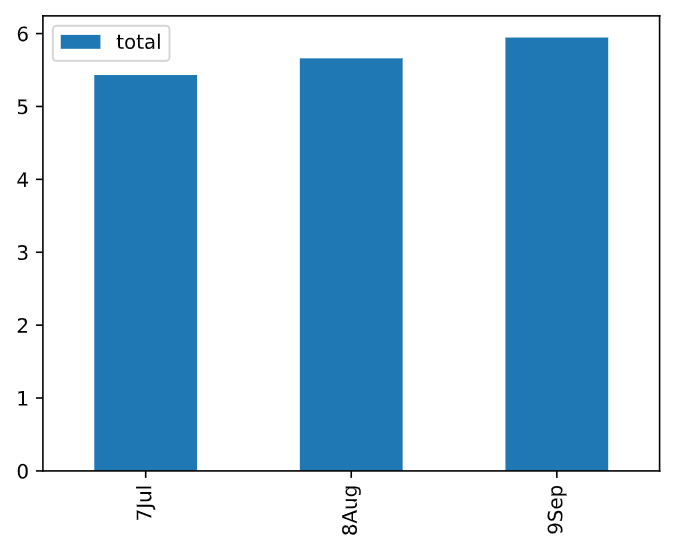

**Using the append method**

In [ ]:
# Use the .append() method to combine the tracks tables
metallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort=False)

# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items, on='tid')

# For each tid and name sum the quantity sold
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity':'sum'})

# Sort in decending order by quantity and print the results
print(tracks_sold.sort_values(['quantity'], ascending=False))

In [ ]:
Output:
                                 quantity
tid  name                             
1853 Battery                         2
1876 For Whom The Bell Tolls         2
1854 Master Of Puppets               1
1857 Disposable Heroes               1
1875 Ride The Lightning              1
1877 Fade To Black                   1
1882 Frantic                         1
1884 Some Kind Of Monster            1
1886 Invisible Kid                   1

### 1.8 Verifying integrity

In [ ]:
# default: validate = None
tracks.merge(specs, on='tid', validate = 'one_to_one')

In [ ]:
albums.merge(tracks, on='aid', validate='one_to_many')
# one_to_one, one_to_many, many_to_one, many_to_many

In [ ]:
pd.concat([inv_feb, inv_mar], verify_integrity = True)

## 2. Merging time-series data

### 2.1 .merge_ordered()

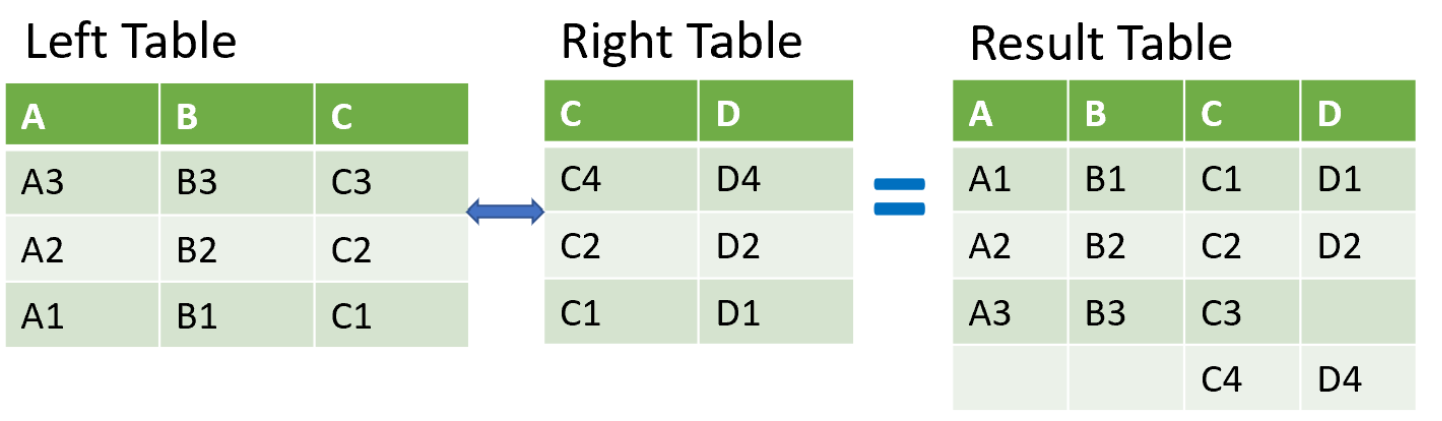

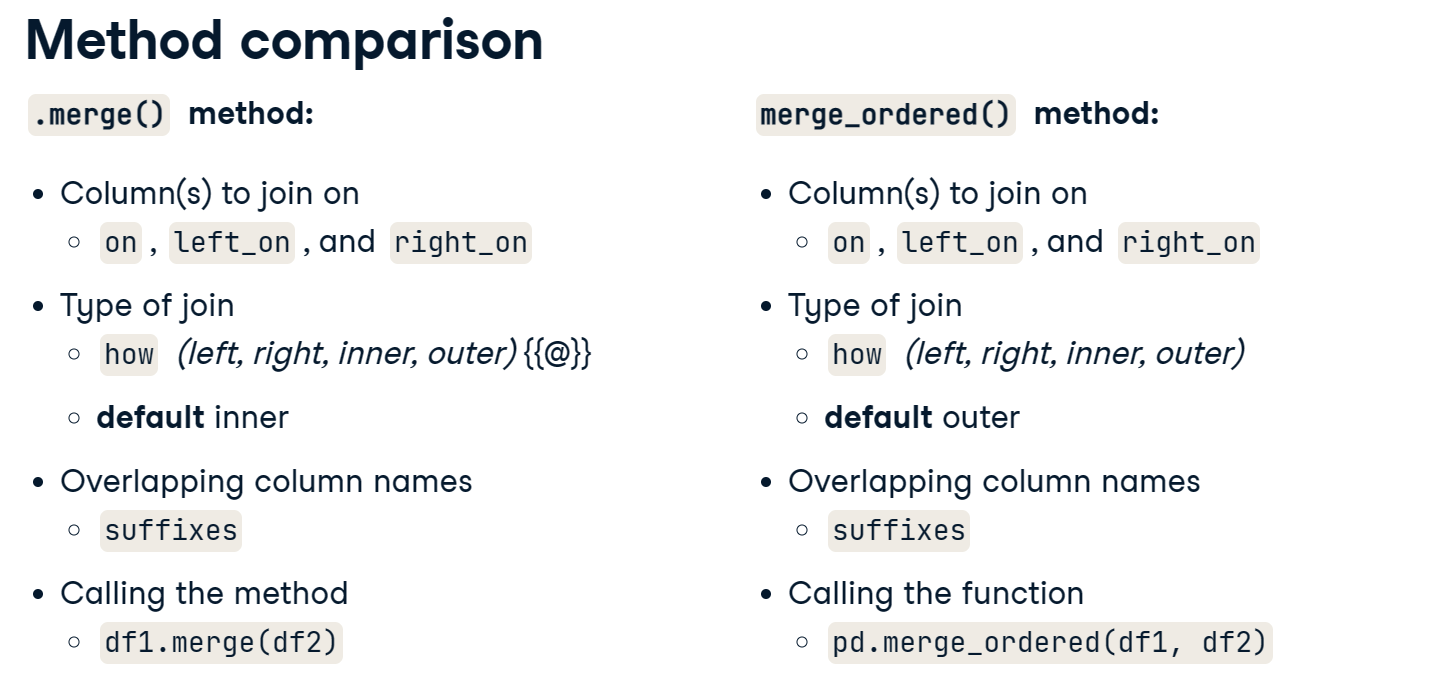

In [9]:
date = ['2007-02-01','2007-03-01','2007-04-01']
close = [12.087, 13.2726, 14.2571]
dict_appl = {'date': date,'close': close}
appl = pd.DataFrame(dict_appl)
appl

,date,close
0,2007-02-01,12.0870
1,2007-03-01,13.2726
2,2007-04-01,14.2571


In [10]:
date_1 = ['2007-01-01','2007-02-01','2007-04-01']
close_1 = [31.087, 43.2726, 44.2571]
dict_mcd = {'date': date_1,'close': close_1}
mcd = pd.DataFrame(dict_mcd)
mcd

,date,close
0,2007-01-01,31.0870
1,2007-02-01,43.2726
2,2007-04-01,44.2571


In [14]:
# merging stock data 
merge_data = pd.merge_ordered(appl, mcd, on = 'date', suffixes = ('_appl', '_mcd'))
merge_data

,date,close_appl,close_mcd
0,2007-01-01,NaN,31.0870
1,2007-02-01,12.0870,43.2726
2,2007-03-01,13.2726,NaN
3,2007-04-01,14.2571,44.2571


In [15]:
# merging stock data with fullfill = fill forward 
merge_data = pd.merge_ordered(appl, mcd, on = 'date', suffixes = ('_appl', '_mcd'), fill_method = 'ffill')
merge_data

,date,close_appl,close_mcd
0,2007-01-01,NaN,31.0870
1,2007-02-01,12.0870,43.2726
2,2007-03-01,13.2726,43.2726
3,2007-04-01,14.2571,44.2571


### 2.12 .merge_asof()
*- not the exact match, so must be sorted before merging*

# 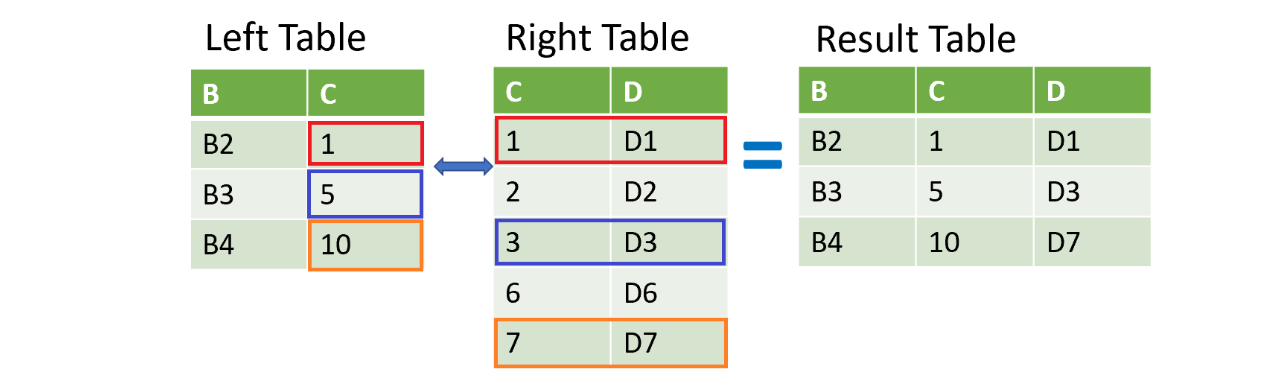

In [ ]:
jpm

In [ ]:
Output:
    date_time   close
0  2017-11-17 15:35:17  98.120
1  2017-11-17 15:40:04  98.180
2  2017-11-17 15:45:01  97.731
3  2017-11-17 15:50:55  97.740
4  2017-11-17 15:55:00  97.815
5  2017-11-17 16:00:30  98.020
6  2017-11-17 16:05:07  97.800
7  2017-11-17 16:10:08  97.840
8  2017-11-17 16:15:11  97.710
9  2017-11-17 16:20:29  97.760
10 2017-11-17 16:25:25  97.820
11 2017-11-17 16:30:53  97.950
12 2017-11-17 16:35:11  97.990
13 2017-11-17 16:40:44  98.060
14 2017-11-17 16:45:52  98.050
15 2017-11-17 16:50:37  98.110
16 2017-11-17 16:55:02  98.180

In [ ]:
wells

In [ ]:
Output: 
    date_time   close
0  2017-11-17 15:35:08  54.323
1  2017-11-17 15:40:00  54.320
2  2017-11-17 15:45:32  54.190
3  2017-11-17 15:50:07  54.170
4  2017-11-17 15:55:00  54.184
5  2017-11-17 16:00:30  54.265
6  2017-11-17 16:05:52  54.200
7  2017-11-17 16:10:22  54.155
8  2017-11-17 16:15:43  54.190
9  2017-11-17 16:20:07  54.205
10 2017-11-17 16:25:13  54.230
11 2017-11-17 16:30:04  54.220
12 2017-11-17 16:35:32  54.220
13 2017-11-17 16:40:09  54.280
14 2017-11-17 16:45:24  54.240
15 2017-11-17 16:50:28  54.170
16 2017-11-17 16:55:42  54.180

In [ ]:
# Use merge_asof() to merge jpm and wells
# direction = "backward" (default) selects the last row in the right DataFrame whose ‘on’ key is less than or equal to the left’s key.
# direction = “forward” search selects the first row in the right DataFrame whose ‘on’ key is greater than or equal to the left’s key.
# direction = A “nearest” search selects the row in the right DataFrame whose ‘on’ key is closest in absolute distance to the left’s key.
jpm_wells = pd.merge_asof(jpm, wells, on = 'date_time', suffixes = ('', 'wells'))
jpm_wells

In [ ]:
Output: 
              date_time   close  close_wells
0  2017-11-17 15:35:17  98.120       54.323
1  2017-11-17 15:40:04  98.180       54.320
2  2017-11-17 15:45:01  97.731       54.190
3  2017-11-17 15:50:55  97.740       54.170
4  2017-11-17 15:55:00  97.815       54.184
5  2017-11-17 16:00:30  98.020       54.265
6  2017-11-17 16:05:07  97.800       54.200
7  2017-11-17 16:10:08  97.840       54.155
8  2017-11-17 16:15:11  97.710       54.190
9  2017-11-17 16:20:29  97.760       54.205
10 2017-11-17 16:25:25  97.820       54.230
11 2017-11-17 16:30:53  97.950       54.220
12 2017-11-17 16:35:11  97.990       54.220
13 2017-11-17 16:40:44  98.060       54.280
14 2017-11-17 16:45:52  98.050       54.240
15 2017-11-17 16:50:37  98.110       54.170
16 2017-11-17 16:55:02  98.180       54.180

In [ ]:
# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on = 'date_time', direction = 'nearest', suffixes=('_jpm', '_bac'))
jpm_wells_bac

Output:
             date_time  close_jpm  close_wells  close_bac
0  2017-11-17 15:35:17     98.120       54.323     26.552
1  2017-11-17 15:40:04     98.180       54.320     26.552
2  2017-11-17 15:45:01     97.731       54.190     26.388
3  2017-11-17 15:50:55     97.740       54.170     26.378
4  2017-11-17 15:55:00     97.815       54.184     26.383
5  2017-11-17 16:00:30     98.020       54.265     26.452
6  2017-11-17 16:05:07     97.800       54.200     26.373
7  2017-11-17 16:10:08     97.840       54.155     26.388
8  2017-11-17 16:15:11     97.710       54.190     26.369
9  2017-11-17 16:20:29     97.760       54.205     26.388
10 2017-11-17 16:25:25     97.820       54.230     26.467
11 2017-11-17 16:30:53     97.950       54.220     26.482
12 2017-11-17 16:35:11     97.990       54.220     26.492
13 2017-11-17 16:40:44     98.060       54.280     26.527
14 2017-11-17 16:45:52     98.050       54.240     26.522
15 2017-11-17 16:50:37     98.110       54.170     26.547
16 2017-11-17 16:55:02     98.180       54.180     26.567

In [ ]:
# Compute price diff, defualt axis = 1 along the column, axis = 0 along the row
price_diffs = jpm_wells_bac.diff()

Output:
          date_time  close_jpm  close_wells  close_bac
0              NaT        NaN          NaN        NaN
1  0 days 00:04:47      0.060       -0.003      0.000
2  0 days 00:04:57     -0.449       -0.130     -0.164
3  0 days 00:05:54      0.009       -0.020     -0.010
4  0 days 00:04:05      0.075        0.014      0.005
5  0 days 00:05:30      0.205        0.081      0.069
6  0 days 00:04:37     -0.220       -0.065     -0.079
7  0 days 00:05:01      0.040       -0.045      0.015
8  0 days 00:05:03     -0.130        0.035     -0.019
9  0 days 00:05:18      0.050        0.015      0.019
10 0 days 00:04:56      0.060        0.025      0.079
11 0 days 00:05:28      0.130       -0.010      0.015
12 0 days 00:04:18      0.040        0.000      0.010
13 0 days 00:05:33      0.070        0.060      0.035
14 0 days 00:05:08     -0.010       -0.040     -0.005
15 0 days 00:04:45      0.060       -0.070      0.025
16 0 days 00:04:25      0.070        0.010      0.020

In [ ]:
# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm','close_wells','close_bac'])
plt.show()

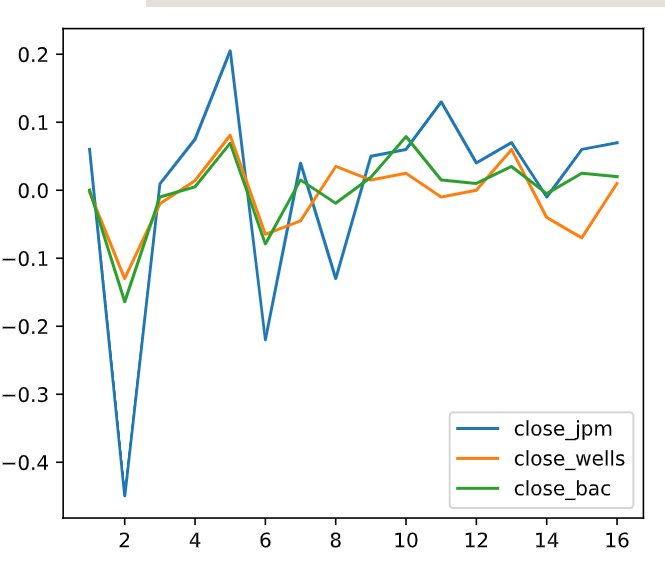

**use merge_asof to create dataset**

In [ ]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp,recession,on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color= is_recession, rot=90)
plt.show()

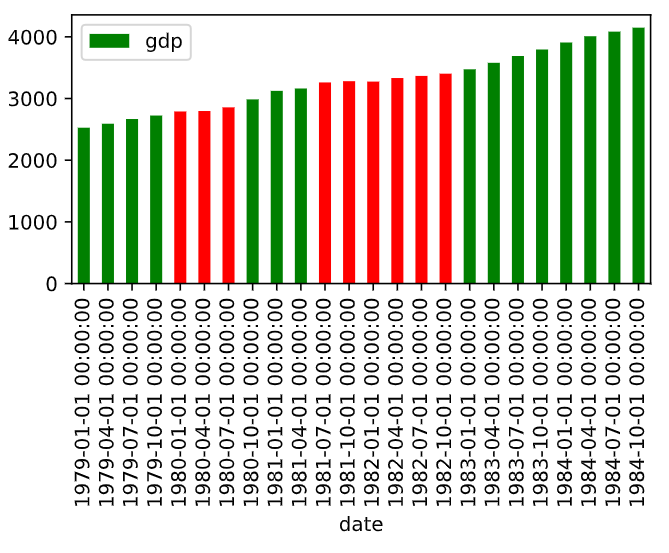

### 2.3 .query()
*- Select columns to determe which rows shoud be returned*

In [31]:
date = ['2007-01-01','2007-02-01','2007-04-01','2007-05-01','2007-05-26']
disney = [131.087, 133.2726, 134.2571, 142.34, 141,22]
nike = [31.087, 43.2726, 44.2571, 42.34, 43.22]
stocks_1 = pd.DataFrame(zip(date,disney), columns={'date','disney'})
stocks_2 = pd.DataFrame(zip(date,nike), columns= {'date','nike'})
stocks = pd.merge_ordered(stocks_1, stocks_2, on = 'date')
stocks

,date,disney,nike
0,2007-01-01,131.0870,31.0870
1,2007-02-01,133.2726,43.2726
2,2007-04-01,134.2571,44.2571
3,2007-05-01,142.3400,42.3400
4,2007-05-26,141.0000,43.2200


In [32]:
stocks.query('nike >= 43')

,date,disney,nike
1,2007-02-01,133.2726,43.2726
2,2007-04-01,134.2571,44.2571
4,2007-05-26,141.0000,43.2200


In [33]:
stocks.query('nike > 40 & disney < 135')

,date,disney,nike
1,2007-02-01,133.2726,43.2726
2,2007-04-01,134.2571,44.2571


In [34]:
stocks.query('nike < 40 or disney < 135')

,date,disney,nike
0,2007-01-01,131.0870,31.0870
1,2007-02-01,133.2726,43.2726
2,2007-04-01,134.2571,44.2571


In [ ]:
# string in query must use ""
stocks.query(' stocks == "disney" and (nike < 40 or disney < 130)')

In [ ]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date>= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

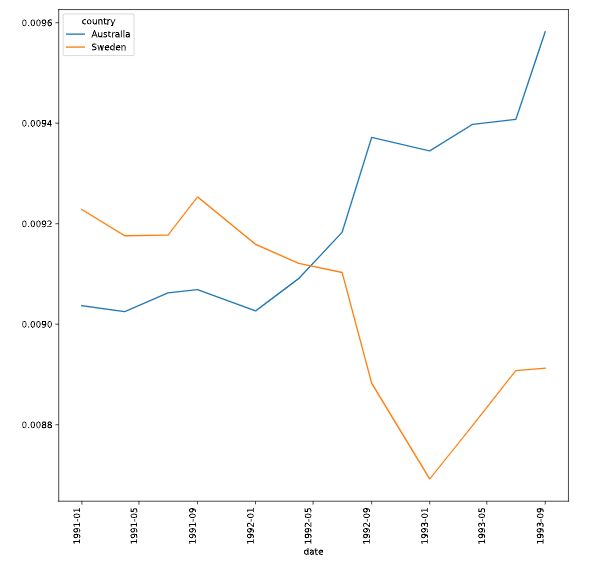

### 2.4 .melt()
*- Reshaping data from wide format to long format*

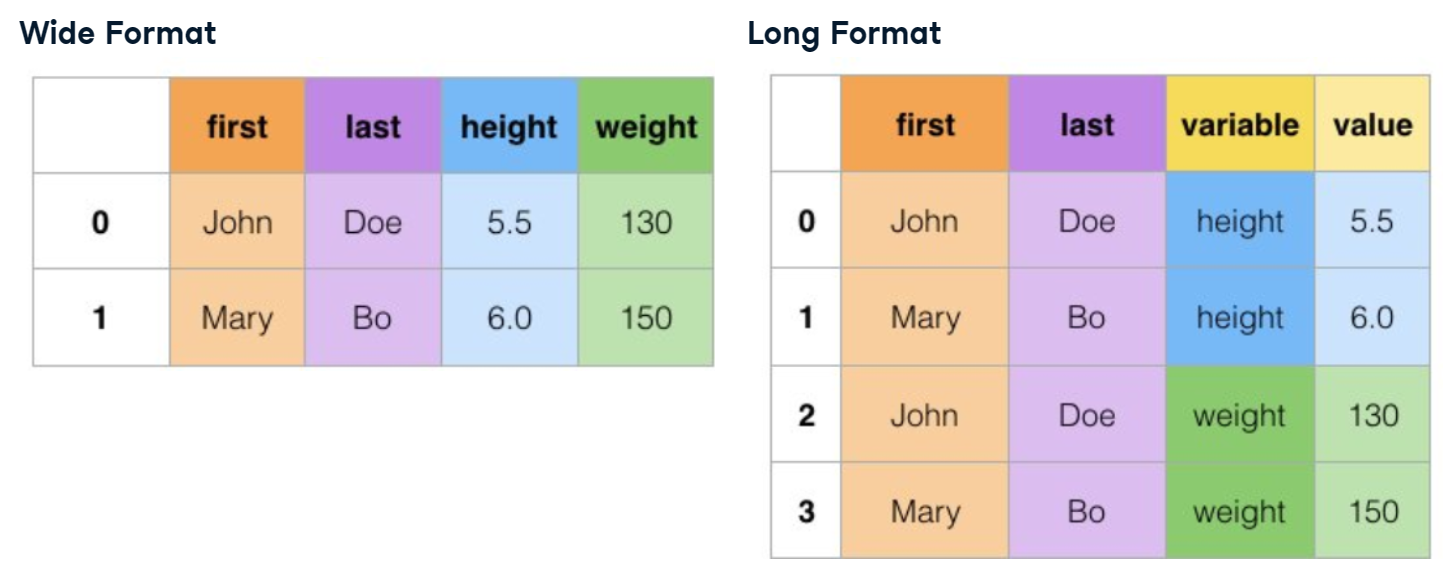

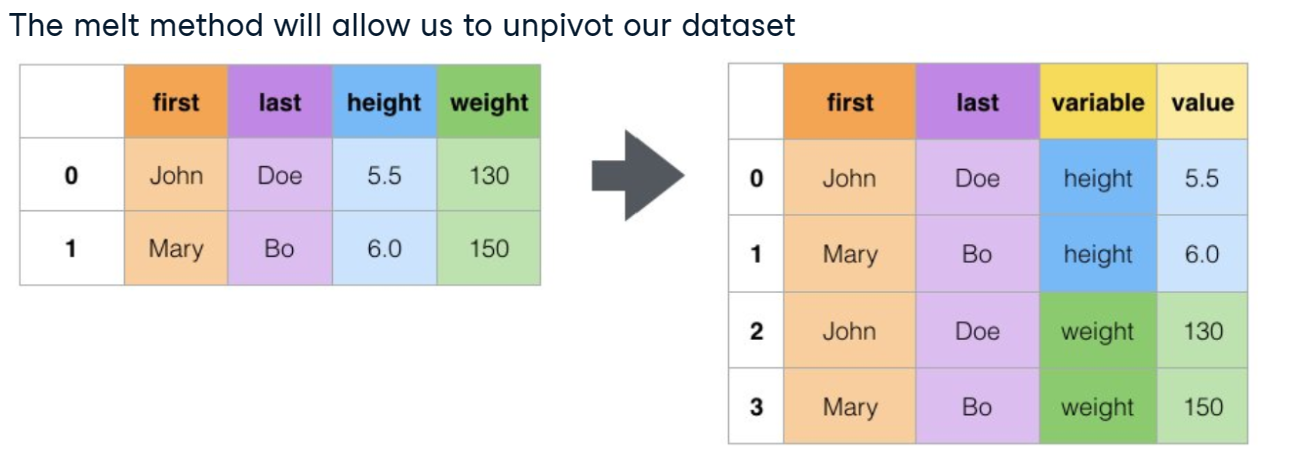

In [ ]:
# Using .melt() to reshape government data
ur_wide

In [ ]:
Output:  
    year  jan  feb  mar  apr  ...  aug  sep  oct  nov  dec
0   2010  9.8  9.8  9.9  9.9  ...  9.5  9.5  9.4  9.8  9.3
1   2011  9.1  9.0  9.0  9.1  ...  9.0  9.0  8.8  8.6  8.5
2   2012  8.3  8.3  8.2  8.2  ...  8.1  7.8  7.8  7.7  7.9
3   2013  8.0  7.7  7.5  7.6  ...  7.2  7.2  7.2  6.9  6.7
4   2014  6.6  6.7  6.7  6.2  ...  6.1  5.9  5.7  5.8  5.6
5   2015  5.7  5.5  5.4  5.4  ...  5.1  5.0  5.0  5.1  5.0
6   2016  4.9  4.9  5.0  5.0  ...  4.9  5.0  4.9  4.7  4.7
7   2017  4.7  4.6  4.4  4.4  ...  4.4  4.2  4.1  4.2  4.1
8   2018  4.1  4.1  4.0  4.0  ...  3.8  3.7  3.8  3.7  3.9
9   2019  4.0  3.8  3.8  3.6  ...  3.7  3.5  3.6  3.5  3.5
10  2020  3.6  3.5  4.4  NaN  ...  NaN  NaN  NaN  NaN  NaN

In [ ]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars = ['year'], var_name = 'month',value_name ='unempl_rate')
ur_tall

In [ ]:
Output:
     year month  unempl_rate
0    2010   jan          9.8
1    2011   jan          9.1
2    2012   jan          8.3
3    2013   jan          8.0
4    2014   jan          6.6
..    ...   ...          ...
127  2016   dec          4.7
128  2017   dec          4.1
129  2018   dec          3.9
130  2019   dec          3.5
131  2020   dec          NaN

[132 rows x 3 columns]

In [ ]:
# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])
ur_tall

In [ ]:
Output:
     year month  unempl_rate       date
0    2010   jan          9.8 2010-01-01
1    2011   jan          9.1 2011-01-01
2    2012   jan          8.3 2012-01-01
3    2013   jan          8.0 2013-01-01
4    2014   jan          6.6 2014-01-01
..    ...   ...          ...        ...
127  2016   dec          4.7 2016-12-01
128  2017   dec          4.1 2017-12-01
129  2018   dec          3.9 2018-12-01
130  2019   dec          3.5 2019-12-01
131  2020   dec          NaN 2020-12-01

[132 rows x 4 columns]

In [ ]:
# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')
ur_sorted

In [ ]:
Output:
    year month  unempl_rate       date
0    2010   jan          9.8 2010-01-01
11   2010   feb          9.8 2010-02-01
22   2010   mar          9.9 2010-03-01
33   2010   apr          9.9 2010-04-01
44   2010   may          9.6 2010-05-01
..    ...   ...          ...        ...
87   2020   aug          NaN 2020-08-01
98   2020   sep          NaN 2020-09-01
109  2020   oct          NaN 2020-10-01
120  2020   nov          NaN 2020-11-01
131  2020   dec          NaN 2020-12-01

[132 rows x 4 columns]

In [ ]:
# Plot the unempl_rate by date
ur_sorted.plot(x='date',y='unempl_rate')
plt.show()

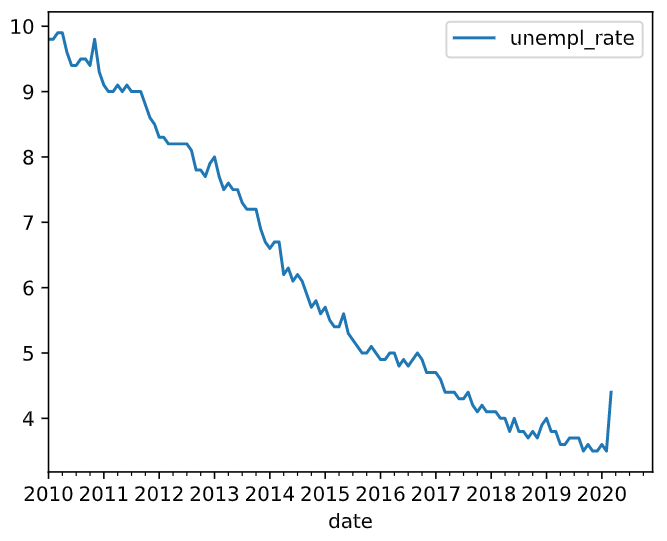

In [ ]:
# Using .melt() for stocks vs bond performance
ten_yr

In [ ]:
Output:
    metric  2007-02-01  2007-03-01  2007-04-01  2007-05-01  ...  2009-08-01  2009-09-01  2009-10-01  2009-11-01  2009-12-01
0   open       0.033      -0.060       0.025      -0.004  ...      -0.007      -0.047      -0.032       0.034      -0.051
1   high      -0.007      -0.041       0.022       0.031  ...       0.032      -0.090       0.012      -0.004       0.099
2    low      -0.016      -0.008       0.031      -0.002  ...       0.040      -0.036      -0.051       0.030       0.007
3  close      -0.057       0.022      -0.004       0.056  ...      -0.029      -0.028       0.026      -0.056       0.201

[4 rows x 36 columns]

In [ ]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars = ['metric'],var_name='date',value_name = 'close')
bond_perc

In [ ]:
Output:   
    metric        date  close
0     open  2007-02-01  0.033
1     high  2007-02-01 -0.007
2      low  2007-02-01 -0.016
3    close  2007-02-01 -0.057
4     open  2007-03-01 -0.060
..     ...         ...    ...
135  close  2009-11-01 -0.056
136   open  2009-12-01 -0.051
137   high  2009-12-01  0.099
138    low  2009-12-01  0.007
139  close  2009-12-01  0.201

[140 rows x 3 columns]

In [ ]:
# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')
bond_perc_close

In [ ]:
Output:
    metric        date  close
3    close  2007-02-01 -0.057
7    close  2007-03-01  0.022
11   close  2007-04-01 -0.004
15   close  2007-05-01  0.056
19   close  2007-06-01  0.029
23   close  2007-07-01 -0.052
27   close  2007-08-01 -0.049
31   close  2007-09-01  0.009
35   close  2007-10-01 -0.023
39   close  2007-11-01 -0.112
43   close  2007-12-01  0.016
47   close  2008-01-01 -0.098
51   close  2008-02-01 -0.029
55   close  2008-03-01 -0.029
59   close  2008-04-01  0.095
63   close  2008-05-01  0.076
67   close  2008-06-01 -0.017
71   close  2008-07-01  0.000
75   close  2008-08-01 -0.042
79   close  2008-09-01  0.004
83   close  2008-10-01  0.037
87   close  2008-11-01 -0.255
91   close  2008-12-01 -0.241
95   close  2009-01-01  0.267
99   close  2009-02-01  0.069
103  close  2009-03-01 -0.117
107  close  2009-04-01  0.164
111  close  2009-05-01  0.109
115  close  2009-06-01  0.017
119  close  2009-07-01 -0.006
123  close  2009-08-01 -0.029
127  close  2009-09-01 -0.028
131  close  2009-10-01  0.026
135  close  2009-11-01 -0.056
139  close  2009-12-01  0.201

In [ ]:
# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji,bond_perc_close,on='date',how='inner',suffixes=('_dow', '_bond'))
dow_bond

In [ ]:
Output:
    date  close_dow metric  close_bond
0   2007-02-01      0.005  close      -0.057
1   2007-03-01     -0.026  close       0.022
2   2007-04-01      0.049  close      -0.004
3   2007-05-01      0.052  close       0.056
4   2007-06-01     -0.016  close       0.029
5   2007-07-01      0.038  close      -0.052
6   2007-08-01     -0.064  close      -0.049
7   2007-09-01      0.067  close       0.009
8   2007-10-01      0.002  close      -0.023
9   2007-11-01     -0.024  close      -0.112
10  2007-12-01     -0.011  close       0.016
11  2008-01-01     -0.059  close      -0.098
12  2008-02-01     -0.036  close      -0.029
13  2008-03-01      0.013  close      -0.029
14  2008-04-01      0.021  close       0.095
15  2008-05-01     -0.001  close       0.076
16  2008-06-01     -0.043  close      -0.017
17  2008-07-01     -0.057  close       0.000
18  2008-08-01      0.025  close      -0.042
19  2008-09-01     -0.069  close       0.004
20  2008-10-01     -0.154  close       0.037
21  2008-11-01     -0.080  close      -0.255
22  2008-12-01      0.058  close      -0.241
23  2009-01-01     -0.037  close       0.267
24  2009-02-01     -0.165  close       0.069
25  2009-03-01      0.042  close      -0.117
26  2009-04-01      0.065  close       0.164
27  2009-05-01      0.057  close       0.109
28  2009-06-01      0.039  close       0.017
29  2009-07-01     -0.048  close      -0.006
30  2009-08-01      0.111  close      -0.029
31  2009-09-01      0.058  close      -0.028
32  2009-10-01     -0.008  close       0.026
33  2009-11-01      0.077  close      -0.056
34  2009-12-01     -0.003  close       0.201

In [ ]:
# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow','close_bond'], x='date', rot=90)
plt.show()

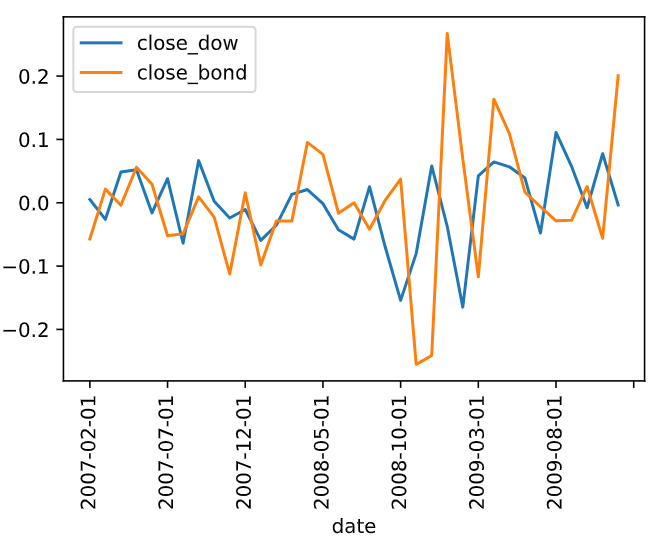

## 3. SQL
- SQLite database
- Package to access to SQLite databse 
  - sqlite3 
  - SQLAlchemy (below)

### 3.1 Creating a database engine

In [ ]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
print(table_names)

In [ ]:
Output:
['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 
 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']

### 3.2 Querying relational database
<br>
- *Import packages and functions*
<br>
- *Create the database engine*
<br>
- *Connect to the engine*
<br>
- *Query the database*
<br>
- *Save query results to a DataFrame*
<br>
- *Close the connection*


In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine connection: con
con = engine.connect()

# Perform query: rs
rs = con.execute("select * from Album")

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())

In [ ]:
Output:
    0                                      1  2
0  1  For Those About To Rock We Salute You  1
1  2                      Balls to the Wall  2
2  3                      Restless and Wild  2
3  4                      Let There Be Rock  1
4  5                               Big Ones  3

In [ ]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("select LastName,Title from Employee")
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

In [ ]:
Output:
  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent

In [ ]:
# Filtering the records using WHERE
# Create engine: engine
engine = create_engine("sqlite:///Chinook.sqlite")

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("Select * from Employee Where EmployeeId >=6")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())

In [ ]:
Output:
    EmployeeId  LastName FirstName       Title  ReportsTo  ... Country PostalCode              Phone                Fax                    Email
0           6  Mitchell   Michael  IT Manager          1  ...  Canada    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com
1           7      King    Robert    IT Staff          6  ...  Canada    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com
2           8  Callahan     Laura    IT Staff          6  ...  Canada    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com

In [ ]:
# ordering your records with order by
# Create engine: engine
engine = create_engine("sqlite:///Chinook.sqlite")

# Open engine in context manager
with engine.connect() as con:
    rs = con.execute("select * from Employee Order by BirthDate")
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

# Print head of DataFrame
print(df.head())

In [ ]:
Output:
    EmployeeId  LastName FirstName                Title  ReportsTo  ... Country PostalCode              Phone                Fax                     Email
0           4      Park  Margaret  Sales Support Agent        2.0  ...  Canada    T2P 5G3  +1 (403) 263-4423  +1 (403) 263-4289  margaret@chinookcorp.com
1           2   Edwards     Nancy        Sales Manager        1.0  ...  Canada    T2P 2T3  +1 (403) 262-3443  +1 (403) 262-3322     nancy@chinookcorp.com
2           1     Adams    Andrew      General Manager        NaN  ...  Canada    T5K 2N1  +1 (780) 428-9482  +1 (780) 428-3457    andrew@chinookcorp.com
3           5   Johnson     Steve  Sales Support Agent        2.0  ...  Canada    T3B 1Y7   1 (780) 836-9987   1 (780) 836-9543     steve@chinookcorp.com
4           8  Callahan     Laura             IT Staff        6.0  ...  Canada    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772     laura@chinookcorp.com

[5 rows x 15 columns]

### 3.3 Quering database directly with Pandas

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine("sqlite:///Chinook.sqlite")

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("select * from Album", engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))

In [ ]:
Output:  
    AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
True

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine("sqlite:///Chinook.sqlite")

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("select * from Employee where EmployeeId >= 6 Order by BirthDate",engine)

# Print head of DataFrame
print(df.head())

In [ ]:
Output:
EmployeeId  LastName FirstName       Title  ReportsTo  ... Country PostalCode              Phone                Fax                    Email
0           8  Callahan     Laura    IT Staff          6  ...  Canada    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com
1           7      King    Robert    IT Staff          6  ...  Canada    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com
2           6  Mitchell   Michael  IT Manager          1  ...  Canada    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com

[3 rows x 15 columns]

### 3.4 Advanced query
*JOINing tables*

In [ ]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("select Album.Title, Artist.Name from Album Inner join Artist on Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())

In [ ]:
Output:                                 
                                    Title       Name
0  For ThoOutput:se About To Rock We Salute You      AC/DC
1                      Balls to the Wall     Accept
2                      Restless and Wild     Accept
3                      Let There Be Rock      AC/DC
4                               Big Ones  Aerosmith

In [ ]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query("Select * from PlaylistTrack Inner join Track on PlaylistTrack.TrackID = Track.TrackId where Milliseconds < 250000",engine)

# Print head of DataFrame
print(df.head())

In [ ]:
Output:
PlaylistId  TrackId  TrackId              Name  AlbumId  ...  GenreId  Composer Milliseconds    Bytes  UnitPrice
0           1     3390     3390  One and the Same      271  ...       23      None       217732  3559040       0.99
1           1     3392     3392     Until We Fall      271  ...       23      None       230758  3766605       0.99
2           1     3393     3393     Original Fire      271  ...       23      None       218916  3577821       0.99
3           1     3394     3394       Broken City      271  ...       23      None       228366  3728955       0.99
4           1     3395     3395          Somedays      271  ...       23      None       213831  3497176       0.99